## Importing Libraries

In [175]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv("KDDTest+.txt")

In [177]:
df.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [178]:
df.shape

(22543, 43)

In [179]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [180]:
df.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
10317,0,tcp,http,SF,182,541,0,0,0,0,...,1.00,0.00,0.12,0.04,0.0,0.0,0.00,0.0,normal,21
11653,0,udp,private,SF,105,146,0,0,0,0,...,1.00,0.00,0.02,0.00,0.0,0.0,0.00,0.0,normal,19
19986,0,tcp,smtp,SF,1410,480,0,0,0,0,...,0.26,0.10,0.03,0.02,0.0,0.0,0.13,0.0,normal,21
17279,0,udp,private,SF,28,0,0,1,0,0,...,0.00,0.02,0.00,0.00,0.0,0.0,0.00,0.0,teardrop,14
2467,0,udp,private,SF,46,0,0,0,0,0,...,0.99,0.01,0.00,0.00,0.0,0.0,0.00,0.0,snmpguess,14


In [181]:
df['attack'].value_counts()

attack
normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
xterm                13
rootkit              13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
worm                  2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

In [182]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## Encoding Data

In [183]:
df.dtypes.value_counts()

int64      24
float64    15
object      4
Name: count, dtype: int64

In [184]:
for col in df.columns:
    if df[col].dtype == "object":
        print(col)


protocol_type
service
flag
attack


In [185]:
dos_attacks = [
    'apache2', 'back', 'land', 'mailbomb', 'neptune', 'pod',
    'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm'
]

probe_attacks = [
    'ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'
]

r2l_attacks = [
    'ftp_write', 'guess_passwd', 'imap', 'multihop',
    'phf', 'sendmail', 'snmpgetattack', 'snmpguess',
    'warezclient', 'warezmaster', 'xlock', 'xsnoop', 'httptunnel'
]

u2r_attacks = [
    'buffer_overflow', 'loadmodule', 'perl', 'ps',
    'rootkit', 'sqlattack', 'xterm', 'named'
]


In [186]:
def map_attack(label):
    if label == 'normal':
        return 'Normal'
    elif label in dos_attacks:
        return 'DoS'
    elif label in probe_attacks:
        return 'Probe'
    elif label in r2l_attacks:
        return 'R2L'
    elif label in u2r_attacks:
        return 'U2R'
    else:
        return 'Unknown'


In [187]:
df['attack_category'] = df['attack'].apply(map_attack)

print(df['attack_category'].value_counts())


attack_category
Normal    9711
DoS       7459
R2L       2868
Probe     2421
U2R         84
Name: count, dtype: int64


In [188]:
df.drop(columns=['attack'], inplace=True)
x = df.drop(columns=['attack_category'])

In [189]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,21


In [190]:
y = df['attack_category']

In [191]:
y.shape

(22543,)

In [192]:
y.head()

0       DoS
1    Normal
2     Probe
3     Probe
4    Normal
Name: attack_category, dtype: object

In [193]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),['protocol_type','service','flag'])
    ],
    remainder='passthrough'
)

In [194]:
x_encoded = preprocessor.fit_transform(x)

In [195]:
x_encoded.shape

(22543, 117)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(
    x_encoded,
    y,
    test_size=0.1,
    random_state=42,
    stratify=y
)

In [197]:
print(f"{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}")

(20288, 117) (20288,) (2255, 117) (2255,)


In [198]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [199]:
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [200]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

In [201]:
# grid_search.fit(X_train, y_train)


In [202]:

# print(grid_search.best_params_)

# best_rf = grid_search.best_estimator_

In [203]:
best_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [204]:
y_pred_best = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Accuracy: 0.9946784922394678

Classification Report:
               precision    recall  f1-score   support

         DoS       1.00      1.00      1.00       746
      Normal       1.00      0.99      1.00       971
       Probe       1.00      1.00      1.00       242
         R2L       0.98      0.99      0.98       287
         U2R       0.80      0.89      0.84         9

    accuracy                           0.99      2255
   macro avg       0.95      0.97      0.96      2255
weighted avg       0.99      0.99      0.99      2255


Confusion Matrix:
 [[743   3   0   0   0]
 [  0 966   0   5   0]
 [  0   0 241   1   0]
 [  0   0   0 285   2]
 [  0   0   0   1   8]]


In [205]:

# joblib.dump(best_rf, "best_model.pkl")

## Plotting

In [206]:
feature_names = preprocessor.get_feature_names_out()

In [207]:
importances = best_rf.feature_importances_

In [208]:
importances

array([7.80140208e-03, 8.54176498e-03, 8.29712640e-03, 3.42973989e-05,
       3.85106922e-04, 3.72634287e-06, 6.30702359e-05, 8.29484295e-06,
       1.38852567e-06, 2.00405294e-06, 3.29496580e-06, 2.74145122e-06,
       4.00775166e-06, 1.82235640e-03, 4.43091371e-03, 6.16236561e-06,
       5.69046295e-03, 5.35536410e-03, 1.64605940e-06, 1.45640194e-06,
       2.67591520e-04, 3.07141920e-03, 9.28664686e-03, 1.52785865e-06,
       5.12975102e-07, 3.44070229e-02, 5.86651201e-07, 9.75946686e-04,
       1.25137376e-06, 2.59578670e-18, 7.79898758e-07, 3.42830048e-08,
       1.92424374e-06, 3.90453328e-06, 1.18159268e-06, 4.23322713e-06,
       9.49494895e-07, 2.83565963e-06, 1.47260734e-07, 1.28183028e-06,
       7.02322312e-06, 2.00441352e-06, 1.83531243e-05, 6.31563655e-03,
       2.26543684e-04, 7.58273609e-11, 7.40482181e-03, 1.15181503e-09,
       7.15076065e-03, 1.65128403e-06, 2.88871401e-10, 5.44406124e-09,
       4.50362795e-03, 3.19656517e-19, 4.20595037e-07, 3.23418864e-04,
      

In [209]:
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

In [210]:
feature_importance_df

,feature,importance
116,remainder__level,1.123793e-01
79,remainder__src_bytes,7.802959e-02
80,remainder__dst_bytes,5.851429e-02
97,remainder__count,5.360895e-02
107,remainder__dst_host_srv_count,5.004346e-02
...,...,...
45,cat__service_pop_2,7.582736e-11
29,cat__service_klogin,2.595787e-18
53,cat__service_sql_net,3.196565e-19
59,cat__service_tftp_u,0.000000e+00


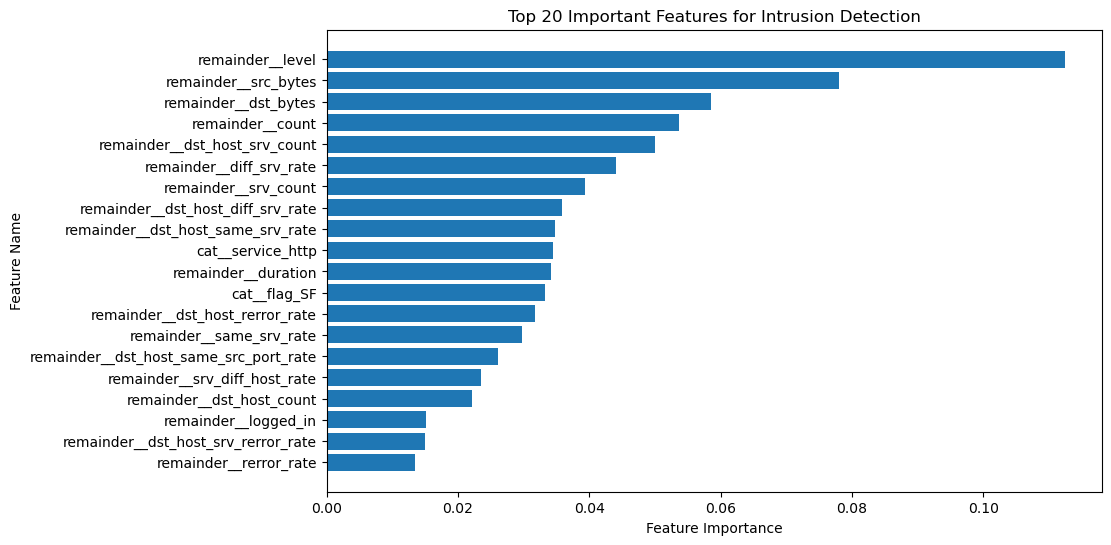

In [211]:
top_features = feature_importance_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 20 Important Features for Intrusion Detection")
plt.gca().invert_yaxis()
plt.show()

## Testing

In [212]:
tmp_df = df.sample(n=1, random_state=42)

print(tmp_df)

      duration protocol_type service flag  src_bytes  dst_bytes  land  \
6186      7358           tcp  telnet   SF          0         44     0   

      wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
6186               0       0    0  ...                    0.85   

      dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
6186                    0.15                          0.0   

      dst_host_srv_diff_host_rate  dst_host_serror_rate  \
6186                          0.0                   0.5   

      dst_host_srv_serror_rate  dst_host_rerror_rate  \
6186                      0.59                  0.15   

      dst_host_srv_rerror_rate  level  attack_category  
6186                      0.01     18              DoS  

[1 rows x 43 columns]


In [213]:
X_tmp_test = tmp_df.drop(columns=['attack_category'])
y_tmp_test = tmp_df['attack_category']

X_tmp_test_encoded = preprocessor.transform(X_tmp_test)

y_tmp_pred = best_rf.predict(X_tmp_test_encoded)

In [214]:
y_tmp_pred = best_rf.predict(X_tmp_test_encoded)
y_tmp_pred


array(['DoS'], dtype=object)

In [215]:

X_tmp_test = tmp_df.drop(columns=['attack_category'])
y_tmp_test = tmp_df['attack_category']   # string

X_tmp_test_encoded = preprocessor.transform(X_tmp_test)

y_tmp_pred = best_rf.predict(X_tmp_test_encoded)

print("Accuracy:", accuracy_score(y_tmp_test, y_tmp_pred))


Accuracy: 1.0
